<a href="https://colab.research.google.com/github/CHENNURUHARISH/LLOYDES-CUSTOMER-CHURN-DATA/blob/main/LLOYDES_CUSTOMER_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Head of DataFrame:
    CustomerID  ChurnStatus
0           1            0
1           2            1
2           3            0
3           4            0
4           5            0

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB
None

Description:
         CustomerID  ChurnStatus
count  1000.000000  1000.000000
mean    500.500000     0.204000
std     288.819436     0.403171
min       1.000000     0.000000
25%     250.750000     0.000000
50%     500.500000     0.000000
75%     750.250000     0.000000
max    1000.000000     1.000000


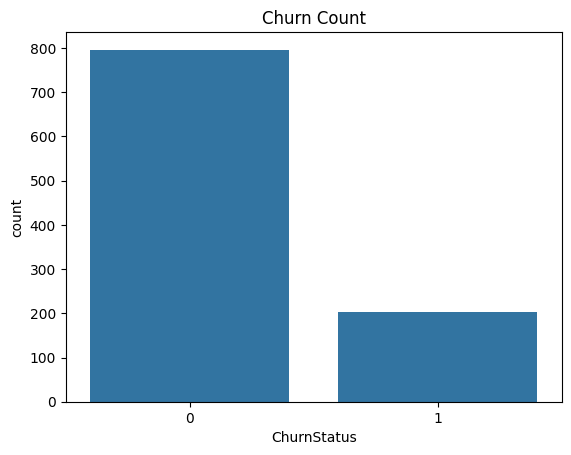

Missing numeric: ['Age', 'Gender', 'IncomeLevel']
Missing categorical: ['Age', 'Gender', 'IncomeLevel']


In [6]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load Churn Data
file_path = "/content/drive/MyDrive/Customer_Churn_Data_Large.xlsx"
df = pd.read_excel(file_path, sheet_name="Churn_Status")
df.head()

# 2. Quick Data Overview
print("Head of DataFrame:\n", df.head())
print("\nInfo:\n")
print(df.info())
print("\nDescription:\n", df.describe(include='all'))

# 3. EDA - Visualizations
sns.countplot(x="ChurnStatus", data=df)
plt.title("Churn Count")
plt.show()

if "Age" in df.columns:
    sns.histplot(data=df, x="Age", hue="ChurnStatus", bins=20, kde=True)
    plt.title("Age Distribution by Churn")
    plt.show()

if "Income" in df.columns:
    sns.boxplot(x="ChurnStatus", y="Income", data=df)
    plt.title("Income vs Churn")
    plt.show()

# 4. Data Preprocessing
X = df.drop(columns=["CustomerID", "ChurnStatus"], errors="ignore")
y = df["ChurnStatus"]

# Manually define features based on your dataset
numeric_features = ["Age", "Gender", "IncomeLevel"]
categorical_features = ["Age", "Gender", "IncomeLevel"]
# Check presence of features in data
missing_numeric = [col for col in numeric_features if col not in X.columns]
missing_categorical = [col for col in categorical_features if col not in X.columns]

if missing_numeric or missing_categorical:
    print("Missing numeric:", missing_numeric)
    print("Missing categorical:", missing_categorical)

# Pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])




In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Load Churn Data
file_path = "/content/drive/MyDrive/Customer_Churn_Data_Large.xlsx"
df = pd.read_excel(file_path, sheet_name="Churn_Status")

# 2. Quick Data Overview
print("Head of DataFrame:\n", df.head())
print("\nInfo:\n")
print(df.info())
print("\nDescription:\n", df.describe(include='all'))

# 3. Visualizations
if "Income" in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="ChurnStatus", y="Income", data=df)
    plt.title("Income Distribution by Churn Status")
    plt.xlabel("Churn Status")
    plt.ylabel("Income")
    plt.show()

if "Age" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x="Age", hue="ChurnStatus", bins=30, kde=False, multiple="stack")
    plt.title("Age Distribution by Churn Status")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

# 4. Prepare data for modeling
X = df.drop(columns=["CustomerID", "ChurnStatus"], errors="ignore")
y = df["ChurnStatus"]

print("Available columns:", X.columns.tolist())

# Correctly define numeric and categorical features
numeric_features = [col for col in ["Age", "IncomeLevel"] if col in X.columns]
categorical_features = [col for col in ["Gender"] if col in X.columns]

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

# 5. Pipelines for preprocessing
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Build Pipeline with Random Forest
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, class_weight="balanced"))
])

# # 8. Train Model
# model_pipeline.fit(X_train, y_train)

# # 9. Predictions
# y_pred = model_pipeline.predict(X_test)
# y_proba = model_pipeline.predict_proba(X_test)[:, 1]

# # 10. Evaluation
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

# roc_auc = roc_auc_score(y_test, y_proba)
# print(f"ROC-AUC Score: {roc_auc:.4f}")

# # 11. Plot ROC Curve
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# plt.figure(figsize=(8,6))
# plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.4f})")
# plt.plot([0,1], [0,1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()


Head of DataFrame:
    CustomerID  ChurnStatus
0           1            0
1           2            1
2           3            0
3           4            0
4           5            0

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB
None

Description:
         CustomerID  ChurnStatus
count  1000.000000  1000.000000
mean    500.500000     0.204000
std     288.819436     0.403171
min       1.000000     0.000000
25%     250.750000     0.000000
50%     500.500000     0.000000
75%     750.250000     0.000000
max    1000.000000     1.000000
Available columns: []
Numeric features: []
Categorical features: []
